In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/SLIIT/Data_Science/Data_Science_Projects/End to end E-commerce data analysis project

/content/gdrive/MyDrive/SLIIT/Data_Science/Data_Science_Projects/End to end E-commerce data analysis project


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Ecommerce data.csv', date_parser=True)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


**File structure**

event_time -	Time when event happened at (in UTC).
event_type -	Only one kind of event: purchase.
product_id -	ID of a product
category_id -	Product's category ID
category_code -	Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories.

brand -	Downcased string of brand name. Can be missed.
price -	Float price of a product. Present.
user_id -	Permanent user ID.
user_session -	Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.
Event types

Events can be:

view - a user viewed a product
cart - a user added a product to shopping cart
remove_from_cart - a user removed a product from shopping cart
purchase - a user purchased a product

Multiple purchases per session : A session can have multiple purchase events. It's ok, because it's a single order.

In [4]:
df.isnull().any()

event_time       False
event_type       False
product_id       False
category_id      False
category_code     True
brand             True
price            False
user_id          False
user_session      True
dtype: bool

## **Interesting to see there are null values in 'user sessions'. category code & brand having null values is not a big concern.**

In [5]:
#checking the records where user session is null.
df.loc[df['user_session'].isnull()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2257,2020-09-24 23:47:04 UTC,view,1715896,2144415926731145430,computers.components.network_adapter,NaN,17.40,1515915625496120859,NaN
6872,2020-09-26 05:14:39 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625519884058,NaN
7898,2020-09-26 10:58:24 UTC,view,1785245,2144415925011480748,stationery.cartrige,canon,43.11,1515915625495954428,NaN
11782,2020-09-27 11:59:41 UTC,view,1153724,2144415921169498184,NaN,zte,6.29,1515915625520228004,NaN
24461,2020-09-30 07:31:01 UTC,view,1559260,2144415928845074703,computers.notebook,NaN,16.83,1515915625397674009,NaN
...,...,...,...,...,...,...,...,...,...
796271,2021-02-13 10:49:04 UTC,view,4154439,2144415922587172973,electronics.telephone,NaN,12.22,1515915625584300834,NaN
808622,2021-02-15 12:23:22 UTC,view,630863,2144415925011480748,stationery.cartrige,nv-print,17.62,1515915625605766062,NaN
808625,2021-02-15 12:23:39 UTC,view,630863,2144415925011480748,stationery.cartrige,nv-print,17.62,1515915625605766062,NaN
808626,2021-02-15 12:23:45 UTC,view,630863,2144415925011480748,stationery.cartrige,nv-print,17.62,1515915625605766062,NaN


## **165 records with null values for user sessions. lets keep it as it is for now.**

In [6]:
#convert dates & times into datetime datatype
df['event_time'] = pd.to_datetime(df['event_time'])

#lets get date & time into two seperate columns
df['date'] = df['event_time'].dt.date
df['time'] = df['event_time'].dt.time

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     885129 non-null  datetime64[ns, UTC]
 1   event_type     885129 non-null  object             
 2   product_id     885129 non-null  int64              
 3   category_id    885129 non-null  int64              
 4   category_code  648910 non-null  object             
 5   brand          672765 non-null  object             
 6   price          885129 non-null  float64            
 7   user_id        885129 non-null  int64              
 8   user_session   884964 non-null  object             
 9   date           885129 non-null  object             
 10  time           885129 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 74.3+ MB


##**First, let's see how the overall business has operated over time.**

## **First, how the overall user interaction over time. This includes view, add to cart, remove from cart and purchase actions. So the following figure displayes user interactions (or event) that have taken place in each day over time.**

Text(0, 0.5, 'Count')

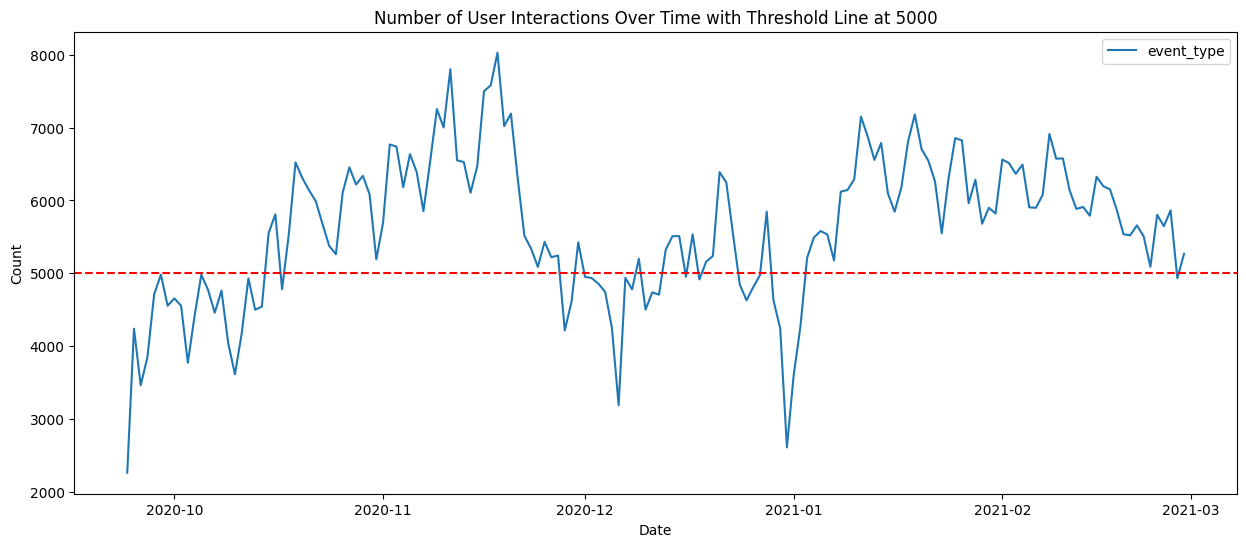

In [8]:
df[['date', 'event_type']].groupby('date').agg({'event_type':'count'}).plot(figsize=(15,6))
# Adding a horizontal line at y=5000
plt.axhline(y=5000, color='r', linestyle='--')
# Adding some labels and title for clarity
plt.title('Number of User Interactions Over Time with Threshold Line at 5000')
plt.xlabel('Date')
plt.ylabel('Count')

## **To get an understanding of the peak times of transaction history, I have added a threshold at y=5000. So during mid October to end of November, mid december, and from January 2021 to March periods it has seen the peak time.**

## **Let's evaluate how many users have engaged with the website over time. Because one user may have done many transactions in the above scenario which might not reflect the reach of the business**



Text(0, 0.5, 'Count')

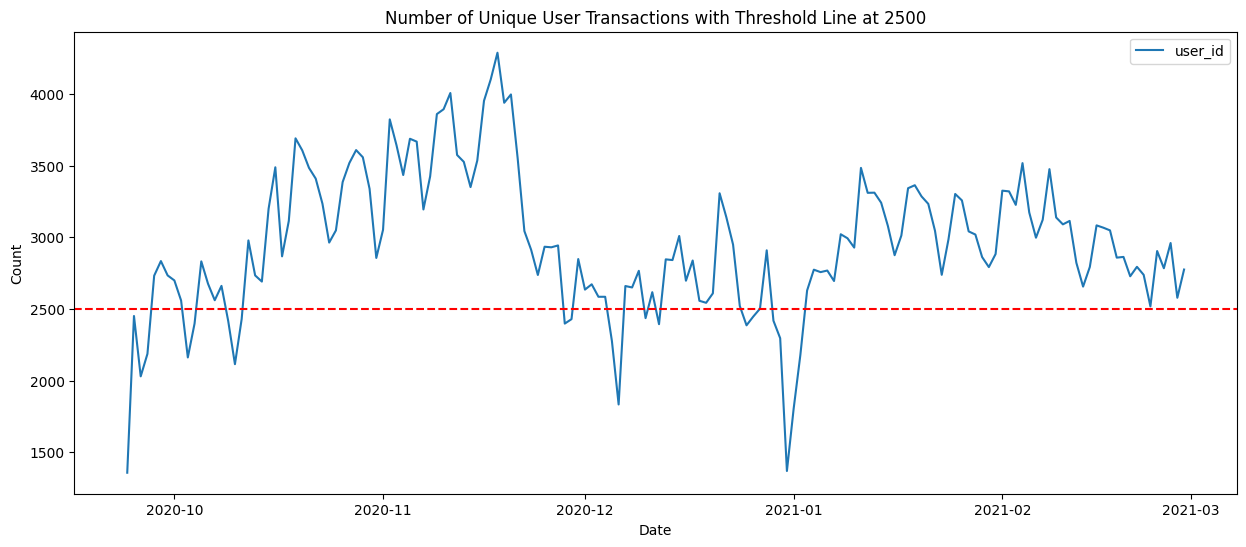

In [9]:
df[['date', 'user_id']].groupby('date').agg({'user_id':'nunique'}).plot(figsize=(15,6))
#Adding a horizontal line at y=2500
plt.axhline(y=2500, color='r', linestyle='--')
# Adding some labels and title for clarity
plt.title('Number of Unique User Transactions with Threshold Line at 2500')
plt.xlabel('Date')
plt.ylabel('Count')

## **As it seems, its the same trend as the overall transactions we found previously. The count is obviously less as one user performs more than one transaction in a one visit to the website.**

## **Next will break down how the how different event types have been recorded over time. (view, add to cart, drop from cart, and purchase)**

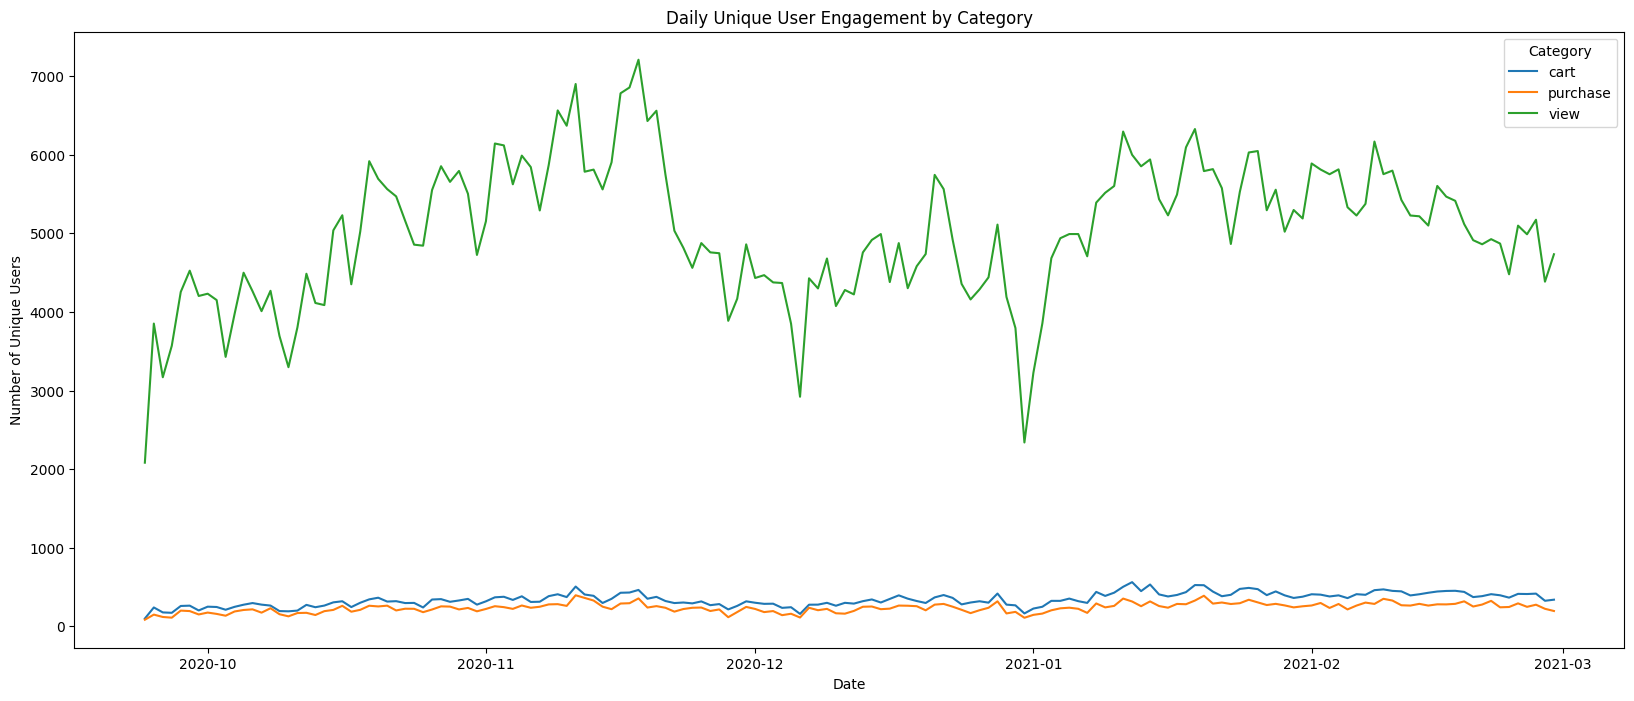

In [10]:
#have to create another dataframe to plot this. Using seaborn is easy for this task.
df_event_types = df[['date', 'event_type']].groupby(['date', 'event_type']).agg(event_counts=('event_type','count')).reset_index()

import seaborn as sns

plt.figure(figsize=(20, 8))
sns.lineplot(x='date', y='event_counts', hue='event_type', data=df_event_types)
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.title('Daily Unique User Engagement by Category')
plt.legend(title='Category')
plt.show()

## **It is obvious that the number of views has been substatially higher than cart and purchasing. No remove from cart events has occured in this period.**

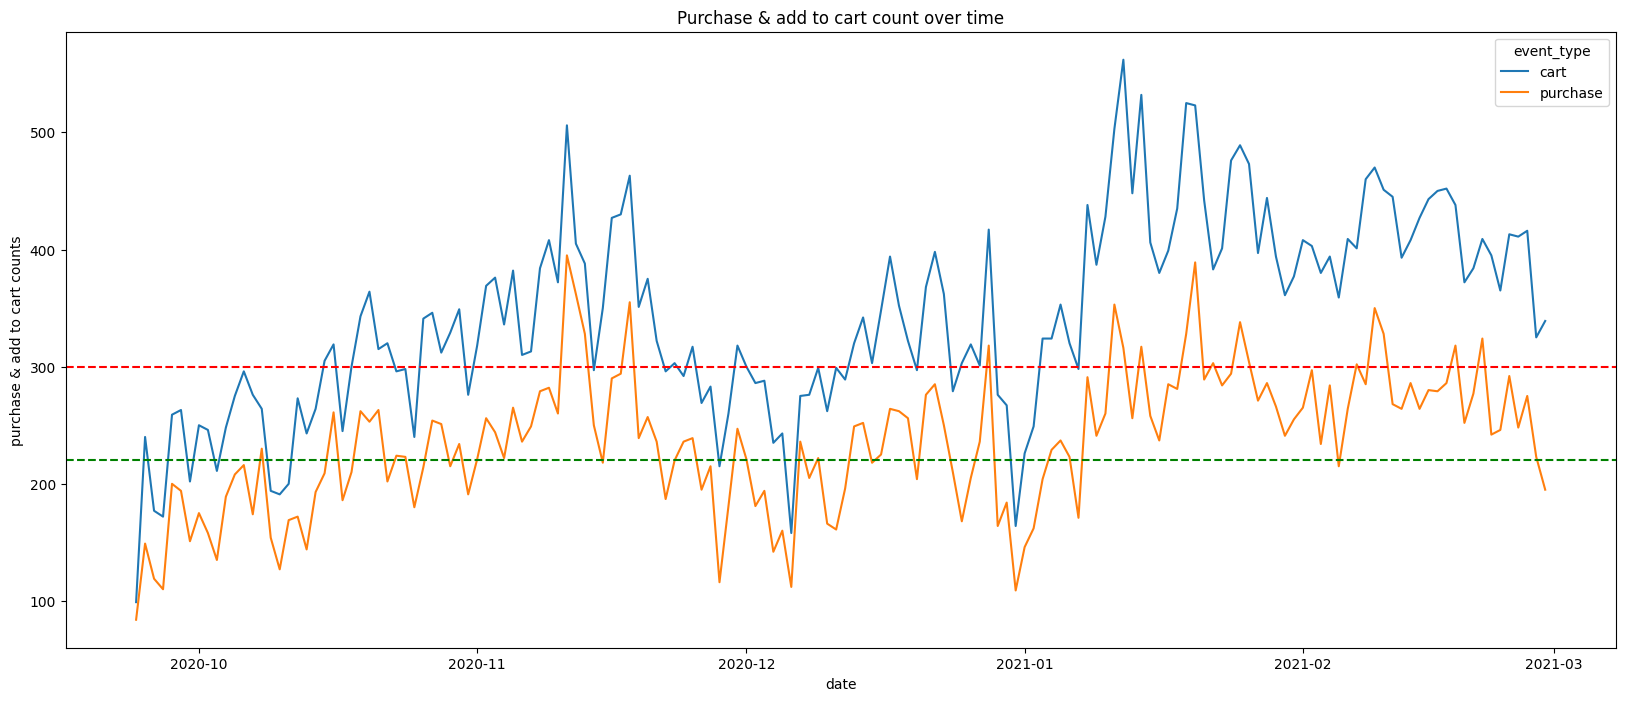

In [11]:
#df_event_types.loc[df_event_types['event_type'] == 'purchase' | df_event_types['event_type'] == 'cart', ['date', 'event_counts']].rename(columns={'event_counts': 'purchase_count'})

new_df_event_types = df_event_types.loc[(df_event_types['event_type'] == 'purchase') | (df_event_types['event_type'] == 'cart'), ['date', 'event_type', 'event_counts']]

plt.figure(figsize=(20, 8))
sns.lineplot(x='date', y='event_counts', hue='event_type', data=new_df_event_types)
plt.axhline(y=220, color='g', linestyle='--')
plt.axhline(y=300, color='r', linestyle='--')
plt.xlabel('date')
plt.ylabel('purchase & add to cart counts')
plt.title('Purchase & add to cart count over time')
plt.show()

## **It appears that it has the same trend of overall transations. peaked in the middle of november of 2020 and during the fist 2 months of 2021.**

## **I just included 2 threshold lines (green & red) to get an idea of peak performance.**

## **I think next, we can valuate how each product has made an effect on customers. Let's try to get an idea about it.**

In [12]:
pd.DataFrame(df['category_code'].value_counts().reset_index())

,index,category_code
0,computers.components.videocards,116717
1,electronics.telephone,84360
2,computers.peripherals.printer,43224
3,stationery.cartrige,38725
4,electronics.audio.acoustic,26766
...,...,...
102,furniture.bedroom.blanket,26
103,appliances.kitchen.refrigerators,15
104,furniture.kitchen.chair,15
105,accessories.briefcase,13


# **It seems like computer videocards have been the product that has affected the customers the most. The above table gives us an idea about the other products as well. But this includes just viewing them as well. Lets get the most purchased & added to cart items during this period to have an idea. Total purchased items of the businees should be the addition of add to cart + purchase**

In [13]:
purchased_items = df.loc[(df['event_type'] == 'purchase') | (df['event_type'] == 'cart'), ['date', 'event_type', 'category_code', 'price', ]]
pd.DataFrame(purchased_items['category_code'].value_counts())

,category_code
computers.components.videocards,19572
electronics.telephone,9506
stationery.cartrige,5780
computers.peripherals.printer,5740
computers.components.cpu,3454
...,...
apparel.glove,1
furniture.bathroom.bath,1
electronics.fax,1
country_yard.watering,1


## **Well, the video cards have been the most sold item as well. The Above table gives us an idea of what are the items that have been sold the most over during the given period.**

## **Total sales = total price of (purchased + add to cart) items**

In [14]:
purchased_items['price'].sum()

13751409.129999999

## **How sales have been over time.**

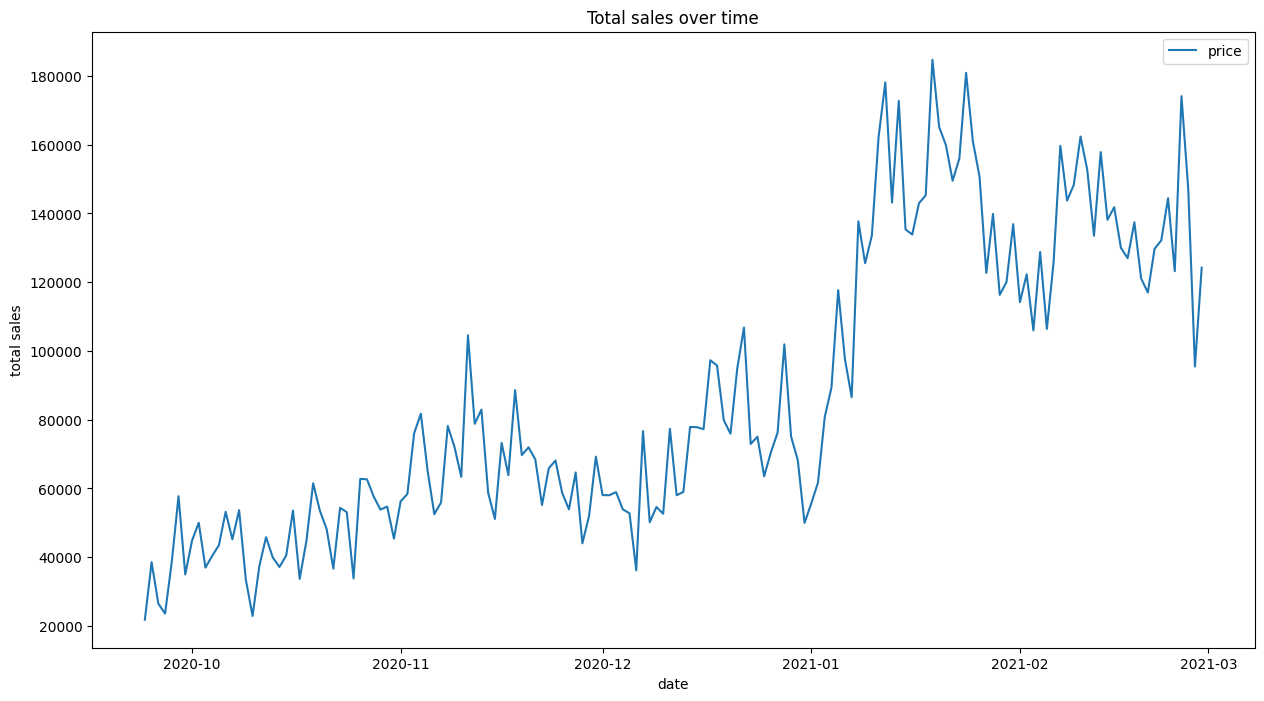

In [15]:
purchased_items.groupby('date').agg({'price':'sum'}).plot(figsize=(15,8))
plt.title('Total sales over time')
plt.xlabel('date')
plt.ylabel('total sales')
plt.show()

## **There is a significant difference when it comes to total sales at the begining of year 2021 compared to previous dates. There can be so many factors influencing this such as inflation. It's great if we can get the numbers adjusted to inflation for a better comparison.**

## **We can check the sales of a specific category as well since the category_code consists of that. Lets find sales info of items of those categories.**

## **It's better if we find the proportion of different category_codes first to get a basic understanding. (lets just check the first category)**

<Axes: ylabel='price'>

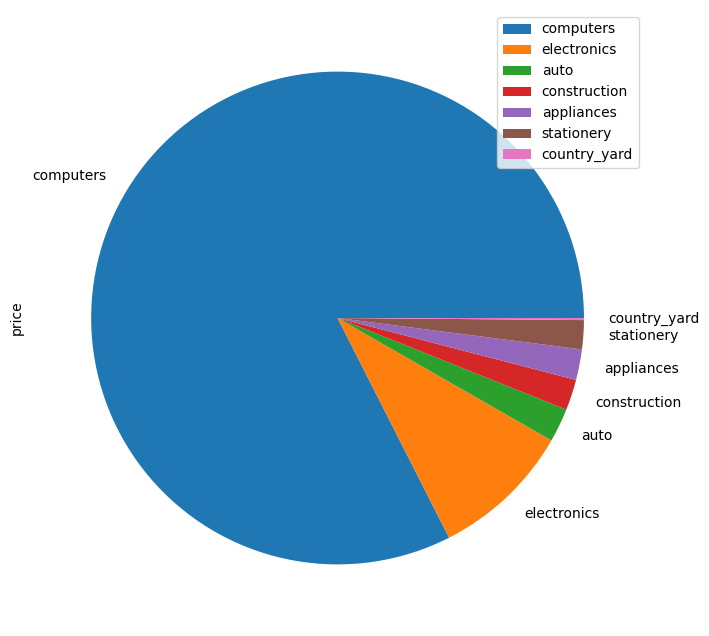

In [16]:
# Split the 'category_code' by '.' and take the first element (first category)
purchased_items['first_category'] = purchased_items['category_code'].str.split('.').str[0]

#total amount for each category
purchased_items.groupby('first_category').agg({'price':'sum'}).sort_values('price', ascending=False).head(7).plot(kind='pie', y='price',figsize=(15,8))

## **Computer devices happen to be the category with the most sales followed by electronics, auto, construction.**

## **Now let's see how total sales have changed over time for computer devices, electronic devices, auto devices and constructon devices.**

Text(0, 0.5, 'total sales')

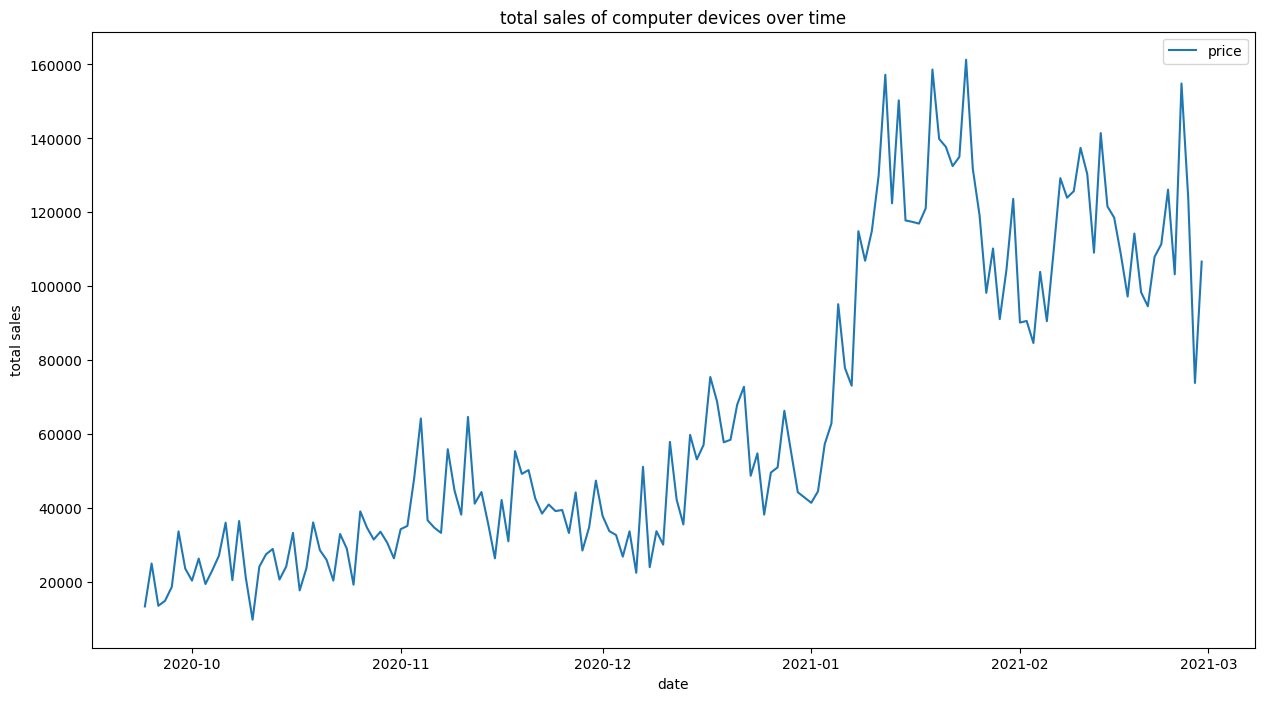

In [17]:
#total sales of computer devices
purchased_items.loc[purchased_items['first_category']=='computers', ['date', 'price']].groupby('date').agg({'price':'sum'}).plot(figsize=(15,8))
plt.title('total sales of computer devices over time')
plt.xlabel('date')
plt.ylabel('total sales')

## **Computer devices has very much the same pattern of the overall sales. There is a significant rise in total sales at the begining of year 2021**

Text(0, 0.5, 'total sales')

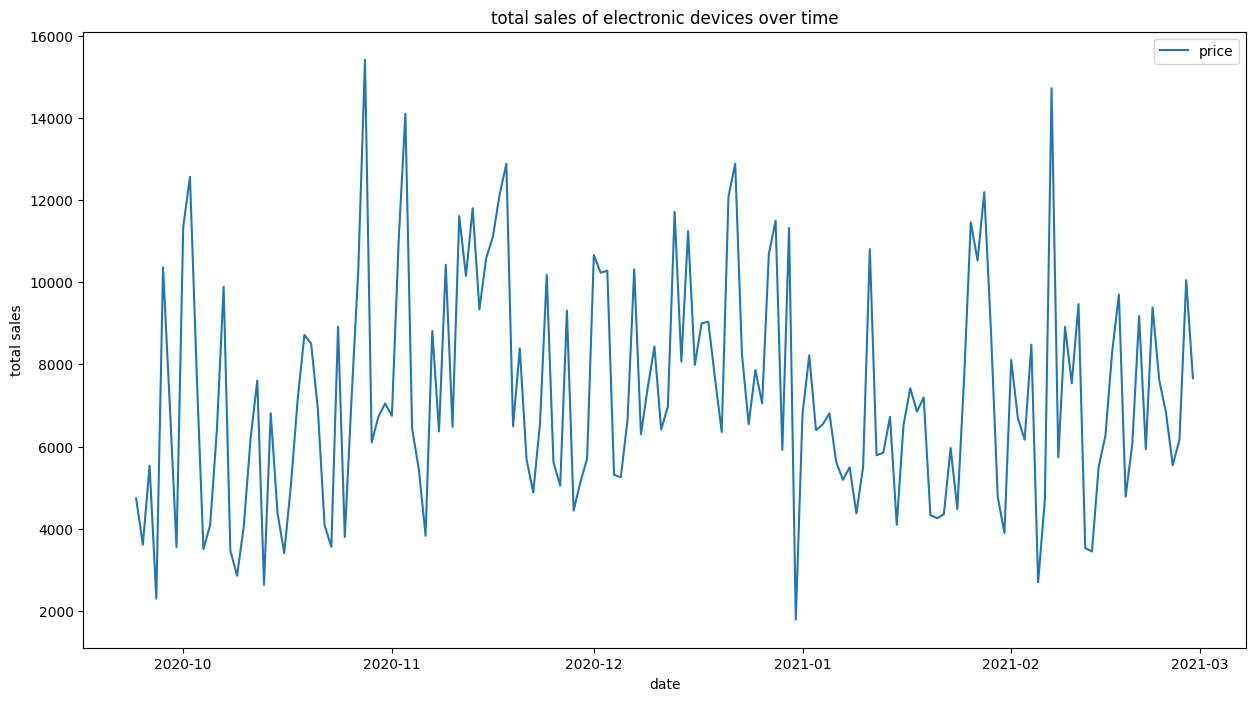

In [18]:
#total sales of electronic devices
purchased_items.loc[purchased_items['first_category']=='electronics', ['date', 'price']].groupby('date').agg({'price':'sum'}).plot(figsize=(15,8))
plt.title('total sales of electronic devices over time')
plt.xlabel('date')
plt.ylabel('total sales')

## **It has fluctuated within a similar range over time contrary to computer devices.**

Text(0, 0.5, 'total sales')

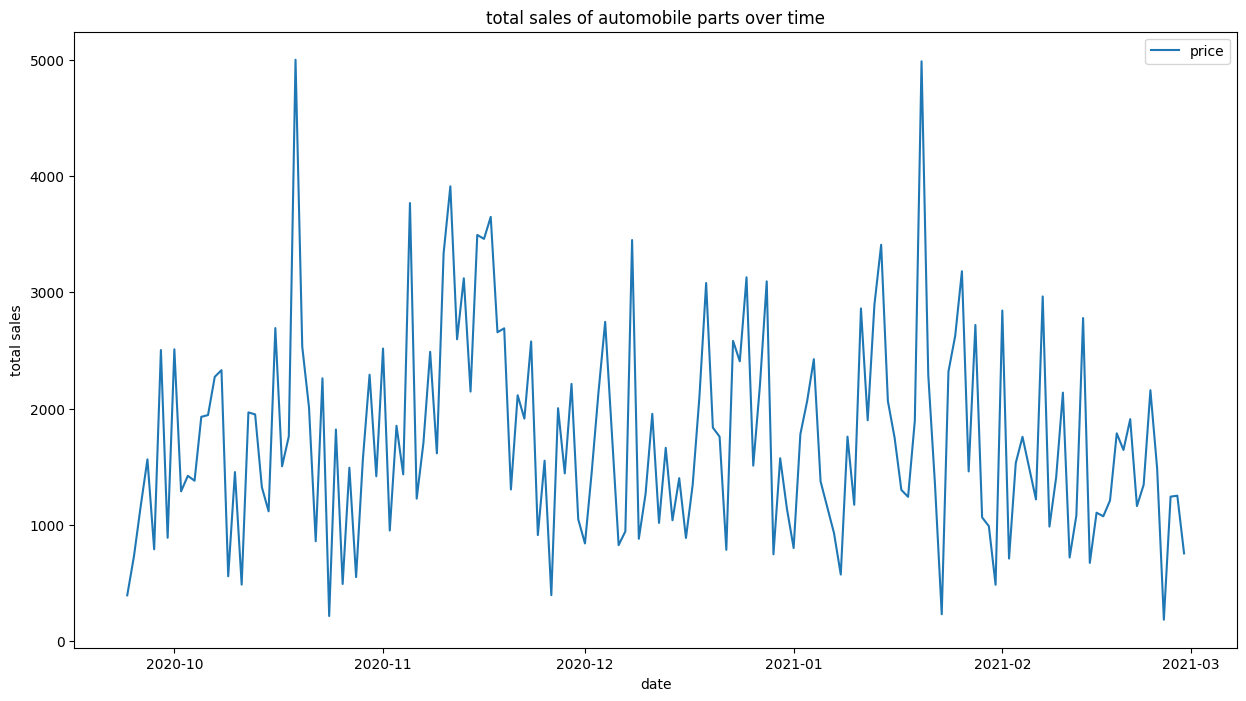

In [19]:
#total sales of automobile parts
purchased_items.loc[purchased_items['first_category']=='auto', ['date', 'price']].groupby('date').agg({'price':'sum'}).plot(figsize=(15,8))
plt.title('total sales of automobile parts over time')
plt.xlabel('date')
plt.ylabel('total sales')

## **Another consistent pattern as it appears.**

Text(0, 0.5, 'total sales')

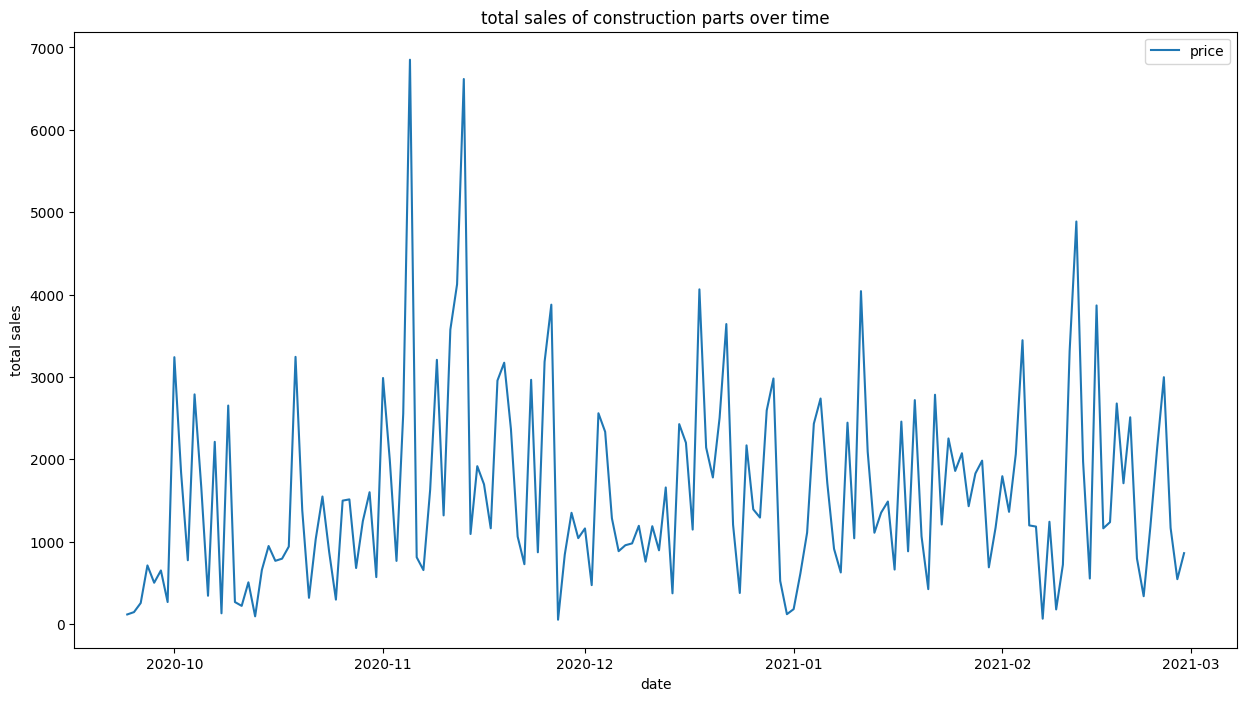

In [20]:
#total sales of electronic devices
purchased_items.loc[purchased_items['first_category']=='construction', ['date', 'price']].groupby('date').agg({'price':'sum'}).plot(figsize=(15,8))
plt.title('total sales of construction parts over time')
plt.xlabel('date')
plt.ylabel('total sales')

## **Another consistent pattern as it appears.**